## Lab 3: RADIO INTERFEROMETRY AT X BAND

In [2]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.time import Time
import time
import get_multimeter

ModuleNotFoundError: No module named 'ugradio'

### Week One
#### Rotation matrix for timing locations
Each group uses rotation matrices to calculate when objects of interest are up. 

#### Solar Fringes
Observe the Sun for a short time to confirm that it sees fringes. 

#### Observe a point source
Each group does a horizon-to-horizon observation of a point source, which requires writing an observing script to run automatically. 

#### Power spectra
Each person calculates Fourier power spectra of the Sun data and also the point-source data.

#### Compare to expected fringe frequencies
Calculate the range of expected local fringe frequencies (equation 14) and compares the observed spectra with these expectations. Be ready for show and tell!

### 8.1. Getting the Data
FIRST WEEK: Before doing the weak sources in the Table, do the Sun for a much shorter time, say an hour. This will give you confidence that the system works (or so we hope). There should be an easily-recognizable signal that you can look at visually, think about, and derive the
approximate declination with pencil and paper. Then later you can write software to do the same, and make sure you get the right answer. Also, during this first week, do the horizon-to-horizon track of one of the sources from the Table.

### 8.2. The Fringe

In [2]:
ugradio.timing.julian_date??

In [4]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])


In [5]:
np.delete(arr, 1, 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [35]:
volts = [np.load(f) for f in glob.glob('/home/cgould/ugradio/ugradio-scout-master/*volts.npy')]
times = [np.load(f) for f in glob.glob('/home/cgould/ugradio/ugradio-scout-master/*unitimes.npy')]

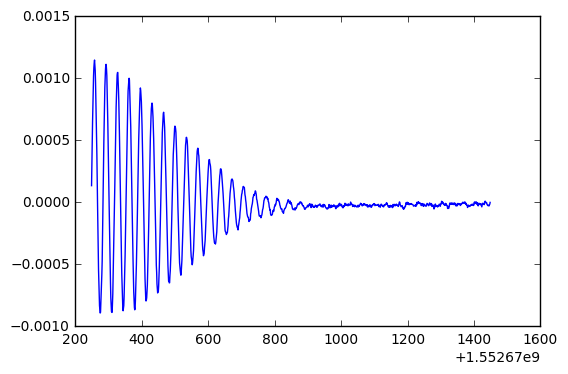

In [42]:
plt.plot(times[0], volts[0])
plt.show()

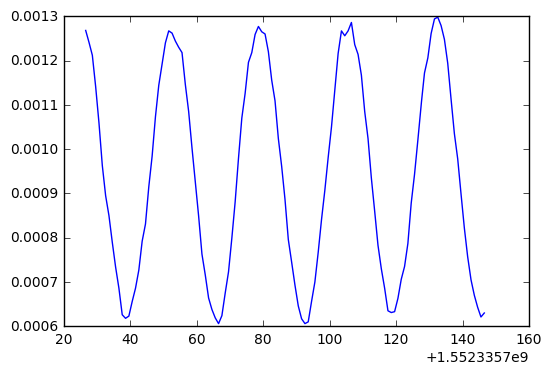

In [47]:
plt.plot(times[1], volts[1])
plt.show()

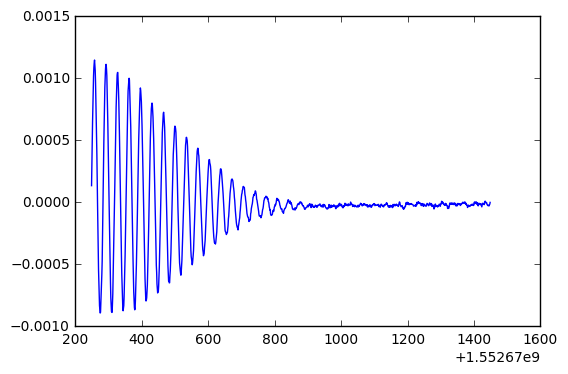

In [48]:
plt.plot(times[2], volts[2])
plt.show()

In [44]:
times[0][10]

1552670258.546824

# Getting Data from the Multimeter

HP_Multimeter():

    '''Client for reading from the HP 3478A Multimeter used to integrate
    baseband voltages in the UGRadio Interferometer.  Sends commands over
    the network to a microcontroller that translates commands to the GPIB
    bus on the back of the multimeter.'''

start_recording(self, dt, tries=10):

     '''Initiate continuous reading from multimeter every dt seconds.

read_voltage(self, bufsize=1024, return_time=False):
        '''Take a one-time reading from the multimeter.

        Parameters
        ----------
        bufsize     : integer, size of receiving buffer in bytes, default 1024
        return_time : bool, return unix time when read occurs, default False

        Returns
        -------
        volts[, time]
        volts       : float, voltage reading from multimeter
        time        : float, unix time when read occurs, if return_time=True'''

end_recording(self):

        '''Terminate continuous reading from multimeter and return recording.
        May take up to dt seconds (as set in start_recording call) to complete
        final read.

get_recording_status(self):
        '''Query current status of recording.

        Parameters
        ----------
        None

        Returns
        -------
        d : dict, status report on recording progress.'''

get_recording_data(self):
        '''Return all data that has been recorded so far.

        Parameters
        ----------
        None

        Returns
        -------
        volts : numpy array, voltages read during recording.
        times : numpy array, times corresponding to each voltage reading.'''

In [188]:
def takedata(dt, tries):

    '''Client for reading from the HP 3478A Multimeter used to integrate
    baseband voltages in the UGRadio Interferometer.  Sends commands over
    the network to a microcontroller that translates commands to the GPIB
    bus on the back of the multimeter.'''
    
    hpm = ugradio.hp_multi.HP_Multimeter() 
    
    '''Initiate continuous reading from multimeter every dt seconds.'''
    hpm.start_recording( dt, tries) 
    
    hpm.get_recording_status()
    
    '''locally wait for 120 seconds (have to exceed the total processing time)'''
    #time.sleep(1200)  
    sleep = dt * tries
    
    '''Terminate continuous reading from multimeter and return recording.
    May take up to dt seconds (as set in start_recording call) to complete
    final read.'''
    hpm.end_recording()
    
    data, times = hpm.get_recording_data() 
        
        
    
    return(data, times, sleep)

Exception in thread Thread-397:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



## Point to the location of the sun¶ 

In [171]:
def sun_alt():
    '''#locate the current position of sun in alt and az'''
    jd = ugradio.timing.julian_date()
    ra,dec = ugradio.coord.sunpos(jd)
    alt,az = ugradio.coord.get_altaz(ra,dec,jd,ugradio.nch.lat,ugradio.nch.lon,ugradio.nch.alt)
    return (alt,az)

In [163]:
ugradio.interf.Interferometer??

class Interferometer:

    '''Interface for controlling the two UGRadio interferometer telescopes together.'''
   
   def point(self, alt, az, wait=True, verbose=False):
        '''Point both antennas to the specified alt/az.'''
    
    def wait(self, verbose=False):
        '''Wait until both telescopes' slewing is complete

        Parameters
        ----------
        verbose : bool, be verbose, default=False

        Parameters
        ----------
        alt     : float degrees, altitude angle to point to
        az      : float degrees, azimuthal angle to point to
        wait    : bool, pause until both antennas have completed pointing, default=True
        verbose : bool, be verbose, default=False'''
   
   def get_pointing(self, verbose=False):
        '''Return the current telescope pointing

        Parameters
        ----------
        verbose : bool, be verbose, default=False

        Returns
        -------
        pointing: dict with {'ant_w':(alt,az), 'ant_e':(alt,az)} for the two antennas'''
    
    def stow(self, wait=True, verbose=False):
        '''Point both antennas to the stow position

        Parameters
        ----------
        wait    : bool, pause until antenna has completed pointing, default=True
        verbose : bool, be verbose, default=False


In [174]:
def point_interferometers(observing_object):
    ifm = ugradio.interf.Interferometer() 
    
    if observing_object == 'sun':
        '''#locate the current position of sun in alt and az'''
        alt,az = sun_alt() 

    '''Point both antennas to the specified alt/az.'''
    ifm.point(alt,az) 

    '''Return the current telescope pointing'''
    pointing = ifm.get_pointing()
    w_alt,w_az = pointing["ant_w"] 
    e_alt,e_az = pointing["ant_e"] 

    print("target:"+ str(alt)+","+str(az)) 
    print("west pointed :"+ str(w_alt)+","+str(w_az)) 
    print("east pointed :"+ str(e_alt)+","+str(e_az))

def stow_interferometers():
    '''Point both antennas to the stow position'''
    ifm.stow()
    print('Telescope stowed')


In [192]:
filename = 'suntest_3_16_1_18pm_'

volts = []
unixtime = []

for i in range(500):
    point_interferometers('sun')
    data, times, sleep = takedata(1, 5)
    volts.append(data)
    unixtime.append(times)
    time.sleep(sleep)
    
np.savez(filename+'_volts.npz', volts)
np.savez(filename+'_time.npz', unixtime)

target:50.5147769186,180.345253134
west pointed :50.4545898438,180.336132812
east pointed :50.5151367188,180.311035156


Exception in thread Thread-412:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:50.5090130504,181.256912459
west pointed :50.4765625,181.215039062
east pointed :50.5151367188,181.255859375
target:50.5082660319,181.32720827
west pointed :50.4985351562,181.302929688
east pointed :50.4711914062,181.365722656
target:50.5075601144,181.390174195
west pointed :50.5205078125,181.412792969
east pointed :50.4931640625,181.387695312
target:50.5069014636,181.44630906
west pointed :50.5205078125,181.412792969
east pointed :50.4931640625,181.409667969
target:50.5061259849,181.509577382
west pointed :50.5205078125,181.478710938
east pointed :50.4931640625,181.453613281
target:50.5053172242,181.572706023
west pointed :50.5205078125,181.566601562
east pointed :50.4931640625,181.585449219
target:50.5015257624,181.838682561
west pointed :50.5205078125,181.830273438
east pointed :50.4931640625,181.783203125
target:50.5005337037,181.901875178
west pointed :50.5205078125,181.940136719
east pointed :50.4931640625,181.849121094
target:50.4995093713,181.964900172
west pointed :50.5

Exception in thread Thread-431:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:50.4606937766,183.601425454
west pointed :50.5205078125,183.675976562
east pointed :50.4711914062,183.541015625
target:50.4570567754,183.717158884
west pointed :50.5205078125,183.741894531
east pointed :50.4272460938,183.694824219
target:50.4550343351,183.779943931
west pointed :50.5205078125,183.8078125
east pointed :50.4272460938,183.760742188
target:50.4514499618,183.888666985
west pointed :50.4765625,183.829785156
east pointed :50.44921875,183.826660156
target:50.4491062817,183.958102742
west pointed :50.4545898438,183.939648438
east pointed :50.44921875,183.958496094
target:50.4469237627,184.02165971
west pointed :50.4326171875,184.005566406
east pointed :50.44921875,184.024414062
target:50.4447268022,184.084614432
west pointed :50.4326171875,184.093457031
east pointed :50.44921875,184.002441406
target:50.4389588573,184.245352041
west pointed :50.4326171875,184.247265625
east pointed :50.4272460938,184.222167969
target:50.4366442435,184.308128864
west pointed :50.4326171875

Exception in thread Thread-440:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:50.4002635376,185.194110845
west pointed :50.4326171875,185.192089844
east pointed :50.3833007812,185.101074219
target:50.3876992976,185.46613918
west pointed :50.4106445312,185.455761719
east pointed :50.3833007812,185.452636719
target:50.3847026558,185.528999093
west pointed :50.4106445312,185.521679688
east pointed :50.361328125,185.540527344
target:50.3813591154,185.59828397
west pointed :50.4106445312,185.587597656
east pointed :50.361328125,185.650390625
target:50.3734572972,185.758639505
west pointed :50.3447265625,185.785351562
east pointed :50.2514648438,185.782226562
target:50.3703058829,185.821332937
west pointed :50.3447265625,185.807324219
east pointed :50.3393554688,185.804199219
target:50.3671241378,185.883936704
west pointed :50.3447265625,185.873242188
east pointed :50.1635742188,185.9140625
target:50.3639041549,185.946606572
west pointed :50.3447265625,185.939160156
east pointed :50.3833007812,185.9140625
target:50.3609929263,186.002691165
west pointed :50.3447

Exception in thread Thread-452:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:50.2870697502,187.280542178
west pointed :50.3447265625,187.301464844
east pointed :50.2734375,187.276367188
target:50.2826326048,187.350017996
west pointed :50.3447265625,187.3234375
east pointed :50.2734375,187.342285156
target:50.2790316028,187.405910447
west pointed :50.3227539062,187.3234375
east pointed :50.2734375,187.342285156
target:50.272483639,187.506450312
west pointed :50.2788085938,187.49921875
east pointed :50.2514648438,187.518066406
target:50.2683607473,187.569052013
west pointed :50.2788085938,187.565136719
east pointed :50.2514648438,187.49609375
target:50.2642190704,187.631408528
west pointed :50.2788085938,187.631054688
east pointed :50.2514648438,187.627929688
target:50.2600427657,187.693761328
west pointed :50.2568359375,187.696972656
east pointed :50.2514648438,187.715820312
target:50.2563000275,187.749203456
west pointed :50.2568359375,187.740917969
east pointed :50.2075195312,187.759765625
target:50.2520446949,187.811748148
west pointed :50.2568359375,1

Exception in thread Thread-489:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:49.7656548001,193.082149399
west pointed :49.7954101562,192.970410156
east pointed :49.7241210938,193.033203125
target:49.7577073612,193.150118223
west pointed :49.7734375,193.146191406
east pointed :49.7021484375,193.187011719
target:49.7505029507,193.211414394
west pointed :49.7514648438,193.212109375
east pointed :49.7241210938,193.143066406
target:49.7440898939,193.265726709
west pointed :49.7514648438,193.256054688
east pointed :49.6801757812,193.252929688
target:49.7376699088,193.319864033
west pointed :49.7514648438,193.321972656
east pointed :49.7680664062,193.230957031
target:49.7303901273,193.380972454
west pointed :49.7294921875,193.387890625
east pointed :49.7241210938,193.318847656
target:49.7230859706,193.441991167
west pointed :49.7294921875,193.431835938
east pointed :49.7241210938,193.428710938
target:49.71040971,193.547200328
west pointed :49.7075195312,193.541699219
east pointed :49.7021484375,193.494628906
target:49.7031133598,193.607368657
west pointed :49.7

Exception in thread Thread-549:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:48.4600392947,201.401662317
west pointed :48.4770507812,201.341992188
east pointed :48.4716796875,201.404785156
target:48.4291301796,201.556541536
west pointed :48.4331054688,201.56171875
east pointed :48.3837890625,201.580566406
target:48.416340634,201.620261466
west pointed :48.4111328125,201.605664062
east pointed :48.427734375,201.602539062
target:48.3975685466,201.713405348
west pointed :48.3891601562,201.715527344
east pointed :48.4057617188,201.712402344
target:48.3675809302,201.86126888
west pointed :48.3891601562,201.825390625
east pointed :48.33984375,201.800292969
target:48.3373924353,202.008988333
west pointed :48.3232421875,201.979199219
east pointed :48.33984375,201.976074219
target:48.3255081649,202.066833675
west pointed :48.3232421875,202.067089844
east pointed :48.3178710938,202.063964844
target:48.3136289718,202.124482953
west pointed :48.3232421875,202.133007812
east pointed :48.3178710938,202.129882812
target:48.3043502337,202.169394031
west pointed :48.3232

Exception in thread Thread-559:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:48.1224140043,203.029941441
west pointed :48.1254882812,202.989941406
east pointed :48.076171875,202.986816406
target:48.1085949714,203.093811109
west pointed :48.103515625,203.099804688
east pointed :48.1201171875,203.074707031
target:48.0962252888,203.150810858
west pointed :48.103515625,203.165722656
east pointed :48.0981445312,203.162597656
target:48.0838277838,203.207777787
west pointed :48.0815429688,203.187695312
east pointed :48.076171875,203.206542969
target:48.0312156411,203.447766164
west pointed :48.0375976562,203.429394531
east pointed :48.0322265625,203.448242188
target:48.0172793378,203.510864681
west pointed :48.015625,203.473339844
east pointed :48.0102539062,203.536132812


Exception in thread Thread-565:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:47.8366333812,204.311727966
west pointed :47.83984375,204.37421875
east pointed :47.8125,204.305175781
target:47.8220931379,204.374867488
west pointed :47.8178710938,204.352246094
east pointed :47.8344726562,204.37109375
target:47.8090735782,204.431242794
west pointed :47.8178710938,204.418164062
east pointed :47.8125,204.415039062
target:47.7960221949,204.487604531
west pointed :47.7958984375,204.484082031
east pointed :47.7905273438,204.480957031
target:47.7828889001,204.544168091
west pointed :47.7739257812,204.55
east pointed :47.7685546875,204.524902344
target:47.7712694967,204.594085311
west pointed :47.7739257812,204.593945312
east pointed :47.7685546875,204.590820312
target:47.7391091945,204.731635187
west pointed :47.7299804688,204.72578125
east pointed :47.724609375,204.72265625
target:47.716281106,204.828732299
west pointed :47.7299804688,204.835644531
east pointed :47.6806640625,204.810546875
target:47.6154930174,205.252219812
west pointed :47.5981445312,205.36298828

Exception in thread Thread-579:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:47.3325305788,206.398756583
west pointed :47.3344726562,205.406933594
east pointed :47.28515625,206.392578125
target:47.3065591488,206.501058701
west pointed :47.2905273438,206.263867188
east pointed :47.3071289062,206.524414062
target:47.2908185844,206.562833265
west pointed :47.2905273438,206.615429688
east pointed :47.28515625,206.568359375
target:47.2309539164,206.796227708
west pointed :47.2465820312,206.769238281
east pointed :47.2192382812,206.766113281
target:47.1211140013,207.218261791
west pointed :47.1586914062,207.120800781
east pointed :47.0874023438,207.205566406
target:47.1050236708,207.279429421
west pointed :47.1147460938,207.18671875
east pointed :47.109375,207.271484375
target:47.0905622363,207.334264689
west pointed :47.0927734375,207.274609375
east pointed :47.0874023438,207.315429688
target:47.0533786144,207.474655541
west pointed :47.048828125,207.384472656
east pointed :47.0434570312,207.447265625
target:47.0388113508,207.529421325
west pointed :47.048828

Exception in thread Thread-591:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:46.790068571,208.445023021
west pointed :46.8071289062,208.285351562
east pointed :46.7797851562,208.392089844
target:46.7245737666,208.680227661
west pointed :46.7412109375,208.878613281
east pointed :46.7358398438,208.677734375
target:46.709432727,208.734268445
west pointed :46.7192382812,208.834667969
east pointed :46.6479492188,208.721679688
target:46.694186273,208.78856042
west pointed :46.697265625,208.614941406
east pointed :46.669921875,208.787597656
target:46.6789882518,208.842555766
west pointed :46.6533203125,208.834667969
east pointed :46.669921875,208.831542969
target:46.6654351383,208.890603125
west pointed :46.6533203125,208.900585938
east pointed :46.6259765625,209.095214844
target:46.6453754816,208.961538127
west pointed :46.6533203125,208.988476562
east pointed :46.58203125,208.897460938
target:46.6189037512,209.054823337
west pointed :46.6313476562,209.032421875
east pointed :46.58203125,209.227050781
target:46.6035607656,209.108723801
west pointed :46.6313476

Exception in thread Thread-603:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:46.2673384692,210.260403559
west pointed :46.2797851562,209.911328125
east pointed :46.2524414062,210.259765625
target:46.2440247634,210.338262387
west pointed :46.2797851562,210.372753906
east pointed :46.2524414062,210.413574219


Exception in thread Thread-605:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:46.0162094085,211.086333613
west pointed :46.0600585938,211.185742188
east pointed :45.9228515625,211.094726562
target:45.9910731251,211.167499524
west pointed :45.9721679688,209.098339844
east pointed :45.966796875,211.160644531
target:45.8670361031,211.564183897
west pointed :45.8842773438,209.691601562
east pointed :45.8349609375,211.556152344
target:45.8485361616,211.622811896
west pointed :45.8623046875,211.669140625
east pointed :45.8569335938,211.556152344
target:45.8211179691,211.709450876
west pointed :45.8403320312,211.625195312
east pointed :45.8129882812,211.731933594
target:45.7993286839,211.778090119
west pointed :45.7963867188,211.75703125
east pointed :45.8129882812,211.797851562
target:45.7826266097,211.830577166
west pointed :45.7744140625,211.800976562
east pointed :45.791015625,211.841796875
target:45.7622457817,211.894476727
west pointed :45.7744140625,211.75703125
east pointed :45.7470703125,211.841796875
target:45.745575942,211.946620915
west pointed :45.7

Exception in thread Thread-395:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:43.32043842,218.602605407
west pointed :43.4013671875,218.6125
east pointed :43.2861328125,218.499511719


Exception in thread Thread-681:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 67, in _read_thread
    v,t = self.read_voltage(return_time=True)
  File "/home/global/lib/python2.7/site-packages/ugradio/hp_multi.py", line 49, in read_voltage
    s.connect(self.hostport)
  File "/usr/lib/python2.7/socket.py", line 228, in meth
    return getattr(self._sock,name)(*args)
error: [Errno 110] Connection timed out



target:43.0353451064,219.288090066
west pointed :43.005859375,219.249707031
east pointed :43.0224609375,219.246582031
target:43.0107470492,219.34646114
west pointed :43.005859375,219.711132812
east pointed :42.9345703125,219.356445312
target:42.990724592,219.393885664
west pointed :42.9619140625,219.337597656
east pointed :42.978515625,219.400390625


timeout: timed out

In [1]:
print(len(volts))
plt.plot(unixtime, volts, 'k.-')
plt.show()

NameError: name 'volts' is not defined